> RoyChao

## 1-0 Environments

In [1]:
# Python:
!python3 --version

# Pip:
!pip --version

# matplotlob, numpy, pandas, sklearn, scipy, seaborn
import matplotlib
print('The matplotlib version is {}'. format(matplotlib. __version__)) 
import numpy as np
print('The numpy version is {}.'.format(np.__version__))
import pandas as pd
print('The pandas version is {}.'.format(pd.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import scipy
print('The scipy version is {}.'.format(scipy.__version__))
import seaborn as sns
print('The seaborn version is {}.'.format(sns.__version__))

Python 3.9.5
pip 21.1.3 from /Users/blueshiner/anaconda3/envs/py39/lib/python3.9/site-packages/pip (python 3.9)
The matplotlib version is 3.4.3
The numpy version is 1.20.3.
The pandas version is 1.3.3.
The scikit-learn version is 1.0.2.
The scipy version is 1.7.1.
The seaborn version is 0.11.2.


## 1-1 Environments Parameters

In [2]:
sns.set( style="ticks" )

## 1-2 Read CSV & Drop

In [3]:
import glob
import pandas as pd
  
# specifying the path to csv files
path = "training_data"
  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None)
    content.append(df)
  
# converting content to data frame
data_frame = pd.concat(content)
print(data_frame)

                     time  generation  consumption
0     2018-01-01 00:00:00        0.00         0.94
1     2018-01-01 01:00:00        0.00         1.44
2     2018-01-01 02:00:00        0.00         0.74
3     2018-01-01 03:00:00        0.00         0.49
4     2018-01-01 04:00:00        0.00         0.46
...                   ...         ...          ...
5827  2018-08-31 19:00:00        0.11         4.05
5828  2018-08-31 20:00:00        0.01         4.13
5829  2018-08-31 21:00:00        0.00         3.90
5830  2018-08-31 22:00:00        0.00         3.64
5831  2018-08-31 23:00:00        0.00         3.55

[291600 rows x 3 columns]


In [4]:
df_raw = data_frame
print(df_raw.head())

                  time  generation  consumption
0  2018-01-01 00:00:00         0.0         0.94
1  2018-01-01 01:00:00         0.0         1.44
2  2018-01-01 02:00:00         0.0         0.74
3  2018-01-01 03:00:00         0.0         0.49
4  2018-01-01 04:00:00         0.0         0.46


## 1-3 Make training dataframe

In [5]:
df_dataset = df_raw.copy()
"""
df_dataset['PRED'] = -1.0

for idx in range( len(df_dataset) - 1 ):
    df_dataset['PRED'][idx] = df_dataset['A'][idx + 1]

df_dataset.drop(df_dataset.tail(1).index, inplace=True)     # drop last one
"""
print( df_dataset.head() )
print( df_dataset.describe() )


                  time  generation  consumption
0  2018-01-01 00:00:00         0.0         0.94
1  2018-01-01 01:00:00         0.0         1.44
2  2018-01-01 02:00:00         0.0         0.74
3  2018-01-01 03:00:00         0.0         0.49
4  2018-01-01 04:00:00         0.0         0.46
          generation   consumption
count  291600.000000  291600.00000
mean        0.780644       1.44444
std         1.188958       1.27682
min         0.000000      -0.23000
25%         0.000000       0.50000
50%         0.020000       0.96000
75%         1.240000       1.98000
max         5.320000      10.65000


In [6]:
df_dataset['time'] = pd.to_datetime(df_dataset['time'])
df_dataset.set_index('time', inplace=True)

In [7]:
from scipy.stats import skew
from scipy.stats import kurtosis

print(len(df))
print(len(df_dataset.resample('1440T').agg({'min', 'max', 'sum', skew, kurtosis})))

df_feature = df_dataset.resample('1440T').agg({'min', 'max', 'sum', skew, kurtosis})

5832
243


In [8]:
df_target = df_dataset['consumption'] - df_dataset['generation']

In [9]:
df_feature

generation                                consumption            \
                  sum      skew   max  min  kurtosis         sum      skew   
time                                                                         
2018-01-01     444.82  1.349001  2.11  0.0  0.749392     1514.70  2.705904   
2018-01-02     197.54  1.601827  1.01  0.0  1.198496     1542.28  2.645318   
2018-01-03    1007.97  1.311670  4.68  0.0  0.223973     1328.64  1.959473   
2018-01-04     760.87  1.563625  4.62  0.0  1.101412     1012.79  3.197081   
2018-01-05     926.79  1.527140  4.81  0.0  0.853975      961.32  3.084802   
...               ...       ...   ...  ...       ...         ...       ...   
2018-08-27    1139.07  1.086976  4.45  0.0 -0.234263     2830.64  1.240008   
2018-08-28    1215.10  1.085031  4.61  0.0 -0.253817     2811.07  0.721008   
2018-08-29    1140.41  1.002398  4.27  0.0 -0.471169     2932.75  0.951724   
2018-08-30    1064.27  1.220957  4.27  0.0  0.185189     2662.85  0.706405   
2018-08-31    1182.51  0.974502  4.36  0.0 -0.553478     2817.48  0.745499   

                                   
             max   min   kurtosis  
time                               
2018-01-01  6.73 -0.01  10.259819  
2018-01-02  8.13  0.28   9.733357  
2018-01-03  4.57  0.20   3.860177  
2018-01-04  4.79  0.18  14.810030  
2018-01-05  4.49  0.17  11.742087  
...          ...   ...        ...  
2018-08-27  8.49  0.36   1.707028  
2018-08-28  6.96  0.34  -0.308219  
2018-08-29  8.45  0.42   1.469815  
2018-08-30  6.30  0.36  -0.404053  
2018-08-31  6.87  0.36  -0.090606  

[243 rows x 10 columns]

In [10]:
dataset_x = []
dataset_y = []

for i in range( len(df_feature) - 4):
  #print(df_feature.iloc[ (i) : (i+5) ].values.flatten().shape)
  #print(df_target.iloc[ (i+5)*24 : (i+6)*24].values.shape )
  dataset_x.append(df_feature.reset_index().drop('time', axis=1).iloc[ (i) : (i+5) ].values.flatten())
  dataset_y.append(df_target.iloc[ (i+5)*24 : (i+6)*24].values)

print(np.asarray(dataset_x).shape)
print(np.asarray(dataset_y).shape)

dataset_x = np.asarray(dataset_x)
dataset_y = np.asarray(dataset_y)

/Users/blueshiner/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(239, 50)
(239, 24)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )

In [12]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [13]:
# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

In [14]:
train_x = dataset_x[0:211]
train_y = dataset_y[0:211]

test_x = dataset_x[211:]
test_y = dataset_y[211:]

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(211, 50) (211, 24) (28, 50) (28, 24)


In [15]:
train_x

array([[4.44820000e+02, 1.34900062e+00, 2.11000000e+00, ...,
        4.49000000e+00, 1.70000000e-01, 1.17420873e+01],
       [1.97540000e+02, 1.60182655e+00, 1.01000000e+00, ...,
        3.88000000e+00, 1.90000000e-01, 1.81221273e+00],
       [1.00797000e+03, 1.31166957e+00, 4.68000000e+00, ...,
        4.90000000e+00, 1.80000000e-01, 8.84201110e+00],
       ...,
       [1.20836000e+03, 1.02459789e+00, 4.26000000e+00, ...,
        7.16000000e+00, 2.40000000e-01, 8.94372826e-01],
       [1.21655000e+03, 9.98359226e-01, 4.21000000e+00, ...,
        8.19000000e+00, 2.30000000e-01, 9.15275247e-01],
       [1.01422000e+03, 9.79643008e-01, 3.98000000e+00, ...,
        6.86000000e+00, 3.80000000e-01, 5.43621471e-02]])

In [16]:
train_y

array([[0.57, 0.44, 0.56, ..., 1.28, 0.89, 0.68],
       [0.41, 0.51, 0.41, ..., 0.7 , 0.6 , 0.51],
       [0.46, 0.54, 0.44, ..., 0.67, 0.53, 0.9 ],
       ...,
       [1.27, 0.31, 1.62, ..., 2.13, 2.44, 1.72],
       [1.28, 1.16, 0.5 , ..., 2.21, 1.71, 1.16],
       [1.85, 1.5 , 1.22, ..., 1.63, 1.71, 0.46]])

In [83]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1))


for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x[train_index]         # 產生訓練資料
  train_y_split = train_y[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x[valid_index]         # 產生驗證資料
  valid_y_split = train_y[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

MultiOutputRegressor
average train MSE: 9.493381714234966e-05
    min train MSE: 9.227034048879071e-05
    max train MSE: 9.707449492716879e-05
average valid MSE: 0.010963239544965702
    min valid MSE: 0.009752108927855205
    max valid MSE: 0.01168696747612816


In [101]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {
  'estimator__n_estimators':[10, 20, 50, 100, 500, 1000], 
  'estimator__subsample':[0.8, 1], 
  'estimator__max_depth':[3, 4, 5, 6, 7, 8, 9]}

# Split data into "trainning data", "testing data", and "validation data"
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=12)
# Try different model parameters
cc = GradientBoostingRegressor()
grid = GridSearchCV(MultiOutputRegressor(cc), param_grid=param_grid)#, cv=cv, verbose=5, n_jobs=-1)
# Train model
grid.fit(train_x, train_y)



grid.best_params_

KeyboardInterrupt: 

In [ ]:
clf = MultiOutputRegressor(GradientBoostingRegressor())
clf.fit(train_x, train_y)

In [ ]:
#save models
import pickle

pickle.dump(clf, open("pretrained.pickle", 'wb'))
clf = pickle.loads("pretrained.pickle")

In [50]:
# Python:
#!python3 --version

# Pip:
#!pip --version

# matplotlob, numpy, pandas, sklearn, scipy, seaborn
import matplotlib
#print('The matplotlib version is {}'. format(matplotlib. __version__)) 
import numpy as np
#print('The numpy version is {}.'.format(np.__version__))
import pandas as pd
#print('The pandas version is {}.'.format(pd.__version__))
import sklearn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))
import scipy
#print('The scipy version is {}.'.format(scipy.__version__))
import seaborn as sns
#print('The seaborn version is {}.'.format(sns.__version__))
from scipy.stats import skew
from scipy.stats import kurtosis

In [51]:
dd1 = pd.read_csv("sample_data/consumption.csv", index_col=None)
dd2 = pd.read_csv("sample_data/generation.csv", index_col=None)

dd1['generation'] = dd2['generation'].copy()

In [52]:
dd1

,time,consumption,generation
0,2018-08-25 00:00:00,2.63,0.00
1,2018-08-25 01:00:00,4.15,0.00
2,2018-08-25 02:00:00,4.91,0.01
3,2018-08-25 03:00:00,5.15,0.01
4,2018-08-25 04:00:00,4.87,0.01
...,...,...,...
163,2018-08-31 19:00:00,3.42,0.03
164,2018-08-31 20:00:00,3.55,0.00
165,2018-08-31 21:00:00,3.07,0.00
166,2018-08-31 22:00:00,2.34,0.00


In [53]:
dd1['time'] = pd.to_datetime(dd1['time'])
dd1.set_index('time', inplace=True)

dd4 = dd1.resample('1440T').agg({'min', 'max', 'sum', skew, kurtosis})

In [54]:
dd4

consumption                                 generation            \
                   sum      skew   max   min  kurtosis        sum      skew   
time                                                                          
2018-08-25       84.04  0.337800  6.56  0.84 -0.528447      27.59  0.886552   
2018-08-26       58.89 -0.233628  3.52  1.07 -1.098884      26.04  0.834698   
2018-08-27       68.70 -0.523317  4.43  0.69 -0.297759      27.53  0.837447   
2018-08-28       60.99 -0.484678  4.60  0.34 -0.180595      28.70  0.888128   
2018-08-29       59.17  0.185534  4.67  0.72  0.168778      28.34  0.764562   
2018-08-30       52.94  0.301204  4.34  0.89 -0.382992      25.00  1.003562   
2018-08-31       95.89  0.232930  6.87  1.26 -1.165280      28.56  0.739051   

                                 
             max  min  kurtosis  
time                             
2018-08-25  3.97  0.0 -0.934342  
2018-08-26  3.78  0.0 -1.030858  
2018-08-27  4.14  0.0 -0.915808  
2018-08-28  4.26  0.0 -0.846417  
2018-08-29  3.99  0.0 -1.088444  
2018-08-30  3.89  0.0 -0.541979  
2018-08-31  4.13  0.0 -1.147954

In [55]:
dd4.reset_index(inplace=True)

test_X = []

for i in range( len(dd4) - 4):
  #print(df_feature.iloc[ (i) : (i+5) ].values.flatten().shape)
  #print(df_target.iloc[ (i+5)*24 : (i+6)*24].values.shape )
  test_X.append(dd4.drop(['time'], axis=1).iloc[ (i) : (i+5) ].values.flatten())


test_X = np.asarray(test_X)

/Users/blueshiner/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [56]:
test_X.shape

(3, 50)

In [57]:
"""
# load pretrained model
import pickle


file = open("pretrained.pickle", 'rb')
clf = pickle.load(file)
file.close()
"""

'\n# load pretrained model\nimport pickle\n\n\nfile = open("pretrained.pickle", \'rb\')\nclf = pickle.load(file)\nfile.close()\n'

In [58]:
from sklearn import datasets
##########################
# SAVE-LOAD using joblib #
##########################
import joblib

# save
#joblib.dump(clf, "model.pkl") 

# load
clf = joblib.load("model.pkl")

In [59]:
clf.predict(test_X)

array([[ 0.85836842,  0.83318038,  0.42747891,  0.58353758,  0.57798944,
         0.51081489,  1.2340615 ,  0.73807568,  0.01159768, -0.18863018,
        -1.14620437, -0.50509753,  0.53255878,  0.21563501, -1.31391128,
        -1.32171875, -1.81752861, -1.10549763,  1.11818137,  1.73385674,
         0.9724804 ,  1.58604028,  0.76770279,  1.47049848],
       [ 0.80752915,  0.81237944,  0.42747891,  0.58353758,  0.59731443,
         0.51081489,  1.2340615 ,  0.73807568,  0.01159768, -0.18863018,
        -1.14620437, -0.50509753,  0.53255878,  0.21563501, -1.55325673,
        -1.17477359, -1.81752861, -1.10549763,  1.11818137,  1.95618683,
         1.05782233,  1.92947934,  0.81082892,  1.53702562],
       [ 0.8371774 ,  0.66106096,  0.30134017,  0.56385408,  0.50146489,
         0.51081489,  1.2340615 ,  0.76679731,  0.01159768, -0.18863018,
        -1.14620437, -0.50509753,  0.77516644,  0.29261529, -1.22213508,
        -1.32171875, -1.81752861, -1.10549763,  1.11818137,  1.95618683,
  

<AxesSubplot:>

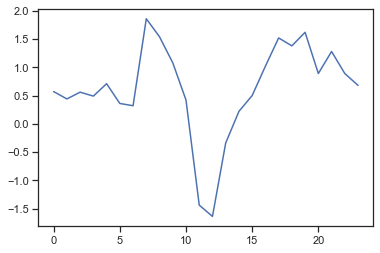

In [100]:
#dataset_x.append(df_feature.reset_index().drop('time', axis=1).iloc[ (i) : (i+5) ].values.flatten())
#dataset_y.append(df_target.iloc[ (i+5)*24 : (i+6)*24].values)

x = np.arange(24)

sns.lineplot(x=x, y=df_target.iloc[ (i+5)*24 : (i+6)*24].values)

In [81]:
24*5

120

<AxesSubplot:>

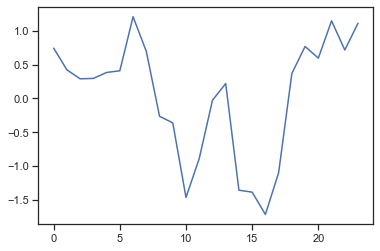

In [101]:
x = np.arange(24)

sns.lineplot(x=x, y=[ 0.74710235,  0.42524022,  0.29206014,  0.29796285,  0.38627681,
         0.411137  ,  1.21334931,  0.69952509, -0.2644397 , -0.36159396,
        -1.46870153, -0.89175595, -0.02616756,  0.22151989, -1.36111229,
        -1.3907772 , -1.72103448, -1.10110683,  0.37235747,  0.77212653,
         0.5987624 ,  1.15271513,  0.71965247,  1.11757733])

In [72]:
pred = clf.predict(train_x)

train_acc = mean_squared_error(pred, train_y) / len(train_y)

print(train_acc)

0.007119509484200731


In [67]:
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor


pred = clf.predict([[ 1.34900062e+00,  2.11000000e+00,  7.49392168e-01,  0.00000000e+00,
        4.44820000e+02,  2.70590355e+00,  6.73000000e+00,  1.02598193e+01,
       -1.00000000e-02,  1.51470000e+03,  1.60182655e+00,  1.01000000e+00,
        1.19849582e+00,  0.00000000e+00,  1.97540000e+02,  2.64531793e+00,
        8.13000000e+00,  9.73335693e+00,  2.80000000e-01,  1.54228000e+03,
        1.31166957e+00,  4.68000000e+00,  2.23972507e-01,  0.00000000e+00,
        1.00797000e+03,  1.95947252e+00,  4.57000000e+00,  3.86017702e+00,
        2.00000000e-01,  1.32864000e+03,  1.56362467e+00,  4.62000000e+00,
        1.10141232e+00,  0.00000000e+00,  7.60870000e+02,  3.19708056e+00,
        4.79000000e+00,  1.48100302e+01,  1.80000000e-01,  1.01279000e+03,
        1.52714022e+00,  4.81000000e+00,  8.53974530e-01,  0.00000000e+00,
        9.26790000e+02,  3.08480231e+00,  4.49000000e+00,  1.17420873e+01,
        1.70000000e-01,  9.61320000e+02]])

train_acc = mean_squared_error(pred, [[ 0.38,  0.37,  0.34,  0.29,  0.67,  0.61,  0.53,  0.49,  0.41,
        0.32, -1.05, -1.91, -2.79, -1.35,  0.12,  0.08,  0.01,  0.5 ,
        0.42,  0.7 ,  0.55,  0.59,  0.34,  0.26]]) / 1

print(train_acc)

0.10503294568177272


In [38]:
pred

array([[ 0.42161575,  0.42563028,  0.32949463,  0.3527674 ,  0.47322244,
         0.44033614,  0.74611351,  0.58208279,  0.28471242, -0.13235256,
        -0.69077341, -1.18017859, -1.87474884, -0.9281369 , -0.24508193,
        -0.36480193, -0.05407548,  0.36082263,  0.63056591,  0.81500349,
         0.78239259,  0.72862136,  0.37789608,  0.32880961]])

In [31]:
train_y

array([[0.57, 0.44, 0.56, ..., 1.28, 0.89, 0.68],
       [0.41, 0.51, 0.41, ..., 0.7 , 0.6 , 0.51],
       [0.46, 0.54, 0.44, ..., 0.67, 0.53, 0.9 ],
       ...,
       [1.27, 0.31, 1.62, ..., 2.13, 2.44, 1.72],
       [1.28, 1.16, 0.5 , ..., 2.21, 1.71, 1.16],
       [1.85, 1.5 , 1.22, ..., 1.63, 1.71, 0.46]])

## Final Version

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
dd1 = pd.read_csv("sample_data/consumption.csv", index_col=None)
dd2 = pd.read_csv("sample_data/generation.csv", index_col=None)

dd1['generation'] = dd2['generation'].copy()

In [3]:
dd1['time'] = pd.to_datetime(dd1['time'])
dd1.set_index('time', inplace=True)

In [5]:
df_all = []

for i in range( 24 ):
    df_all.append( dd1.loc[dd1.index.to_series().dt.hour == i] )

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
from tqdm import tqdm

dataset_x = []

for t in range( 24 ):
    tmp_x = []
    tmp_y = []
    for i in tqdm( range(len(df_all[t]) - 6) ):
      
      atmp = df_all[t].reset_index().drop('time', axis=1).iloc[ (i) : (i+7) ]
      aatmp = atmp.groupby(atmp.index // 7 ).agg({'min', 'max', 'sum', skew, kurtosis}).values[0]
      tmp_x.append(aatmp)

    dataset_x.append(tmp_x)
    
for i in range( 24 ):
    dataset_x[i] = np.asarray(dataset_x[i])

In [ ]:
dd4.reset_index(inplace=True)

test_X = []

for i in range( len(dd4) - 4):
  #print(df_feature.iloc[ (i) : (i+5) ].values.flatten().shape)
  #print(df_target.iloc[ (i+5)*24 : (i+6)*24].values.shape )
  test_X.append(dd4.drop(['time'], axis=1).iloc[ (i) : (i+5) ].values.flatten())


test_X = np.asarray(test_X)

In [ ]:
clf = joblib.load("model.pkl")